### Import Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
model = LinearRegression()

### Import & Inspect Data

In [2]:
data = "healthcare-dataset-stroke-data.csv"
dataframe = pd.read_csv(data)

In [3]:
dataframe.sort_values(by=['stroke'], ascending=False).head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
219,31421,Male,73.0,0,1,Yes,Govt_job,Rural,219.73,28.6,never smoked,1
218,25904,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,NaN,smokes,1
190,24905,Female,65.0,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
191,66071,Male,51.0,1,0,Yes,Private,Urban,112.16,42.5,formerly smoked,1


### Confirming Unique Values in ID series

In [4]:
dataframe.id.nunique()

5110

In [5]:
dataframe['id'].describe()

count     5110.000000
mean     36517.829354
std      21161.721625
min         67.000000
25%      17741.250000
50%      36932.000000
75%      54682.000000
max      72940.000000
Name: id, dtype: float64

## Unique IDs confirmed

### General demographics / contextual data exploration

Numerical data for use in regression needs to be qualified;
Categorical data needs to be restructured for binary conversion via Pandas GetDummies Function.

#### Gender Data

In [6]:
dataframe.groupby('gender')['gender'].count()

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [7]:
# Purge "Other" from dataset
dataframe2 = dataframe
dataframe2.drop(dataframe2[dataframe2['gender'] == 'Other'].index, inplace = True)


dataframe2.groupby('gender')['gender'].count()

gender
Female    2994
Male      2115
Name: gender, dtype: int64

#### Confirmed Gender is now either Male or Female, binary value required for modelling.

#### Smoking Data

In [8]:
dataframe2.groupby('smoking_status')['smoking_status'].count()

smoking_status
Unknown            1544
formerly smoked     884
never smoked       1892
smokes              789
Name: smoking_status, dtype: int64

In [9]:
# Create new column that groups smoking into binary classifications

dataframe3 = dataframe2

dataframe3.loc[dataframe3['smoking_status'] == 'smokes', 'Smoke Qualifier'] = 'Y'
dataframe3.loc[dataframe3['smoking_status'] == 'formerly smoked', 'Smoke Qualifier'] = 'Y'
dataframe3.loc[dataframe3['smoking_status'] == 'never smoked', 'Smoke Qualifier'] = 'N'
dataframe3.loc[dataframe3['smoking_status'] == 'Unknown', 'Smoke Qualifier'] = 'N'
dataframe3['Smoke Qualifier'].describe()

count     5109
unique       2
top          N
freq      3436
Name: Smoke Qualifier, dtype: object

In [10]:
#Inspecting new column addition
dataframe3.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoke Qualifier
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Y
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,N
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,N
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Y
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,N
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Y
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,N
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,N
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,N
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,N


In [11]:
dataframe3.groupby('Smoke Qualifier')['Smoke Qualifier'].count()

Smoke Qualifier
N    3436
Y    1673
Name: Smoke Qualifier, dtype: int64

In [12]:
# Confirmed Smoking is now binary value via new data series "Smoke Qualifier"

#### Residence Type

In [13]:
dataframe3.groupby('Residence_type')['Residence_type'].count()

Residence_type
Rural    2513
Urban    2596
Name: Residence_type, dtype: int64

In [14]:
# Data already in binary structure.

#### Hypertension

In [15]:
dataframe3.groupby('hypertension')['hypertension'].count()

hypertension
0    4611
1     498
Name: hypertension, dtype: int64

In [16]:
# Data already in binary structure.

#### Ever Married

In [17]:
dataframe3.groupby('ever_married')['ever_married'].count()

ever_married
No     1756
Yes    3353
Name: ever_married, dtype: int64

In [18]:
# Data already in binary structure.

#### Heart Disease

In [19]:
dataframe3.groupby('heart_disease')['heart_disease'].count()

heart_disease
0    4833
1     276
Name: heart_disease, dtype: int64

In [20]:
# Data already in binary structure.

## Multi-Linear Regression

#### Full Data Set Option

In [ ]:
X = dataframe3[['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'Smoke Qualifier']]
y = dataframe3['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

In [ ]:
X = dataframe3[['age', 'hypertension', 'heart_disease', 'Smoke Qualifier']]
y = dataframe3['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

In [ ]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

In [ ]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #Changed from 42 to 1

X_train.head()

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train.ravel())

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [ ]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

#### End Full Data Set Option

#### Limited Data Set Option (Maybe increases accuracy)

In [ ]:
dataframe4 = dataframe3

X = dataframe4[['age', 'hypertension', 'heart_disease', 'Smoke Qualifier']]
y = dataframe4['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

In [ ]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

In [ ]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #Changed from 42 to 1

X_train.head()

In [ ]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

##### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

In [ ]:
classifier.fit(X_train, y_train.ravel())

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [ ]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

#### End Limited Data Set Option

### [  Sandbox / Testing  ]

In [ ]:
X = dataframe3['hypertension'].values.reshape(-1,1)
y = dataframe3['stroke'].values.reshape(-1,1)
#data = X.copy()
#data_binary_encoded = pd.get_dummies(data, columns=['gender'])
#data_binary_encoded.head()
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Hypertenson Plot")
plt.show()
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

# Logistic Modeling Revisited

In [21]:
dataframe5 = dataframe3
dataframe5

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Smoke Qualifier
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Y
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,N
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,N
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Y
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,N
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,N
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,N
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Y


In [22]:
X = dataframe5[['age', 'hypertension', 'heart_disease', 'Smoke Qualifier', 'stroke']]
print(X.shape)

(5109, 5)


In [23]:
data = X.copy()
data_binary_encoded2 = pd.get_dummies(data)
data_binary_encoded2.head()

,age,hypertension,heart_disease,stroke,Smoke Qualifier_N,Smoke Qualifier_Y
0,67.0,0,1,1,0,1
1,61.0,0,0,1,1,0
2,80.0,0,1,1,1,0
3,49.0,0,0,1,0,1
4,79.0,1,0,1,1,0


In [24]:
# Assign X (data) and y (target)
X = data_binary_encoded2.drop("stroke", axis=1)
y = data_binary_encoded2["stroke"]
print(X.shape, y.shape)

(5109, 5) (5109,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [27]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [28]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9545810493343775
Testing Data Score: 0.9413145539906104


In [30]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:100]}")
print(f"First 10 Actual labels: {y_test[:100].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Multi-Linear Regression v2.0

#### Full Data Set Option

In [43]:
dataframe6 = dataframe3

dataframe6.drop(dataframe6[dataframe6['stroke'] == 0].index, inplace = True)

In [44]:
X = dataframe6[['age', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'Smoke Qualifier']]
y = dataframe6['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

(249, 7) (249, 1)


In [45]:
X = dataframe6[['age', 'hypertension', 'heart_disease', 'Smoke Qualifier']]
y = dataframe6['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

(249, 4) (249, 1)


In [46]:
data = X.copy()
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,age,hypertension,heart_disease,Smoke Qualifier_N,Smoke Qualifier_Y
0,67.0,0,1,0,1
1,61.0,0,0,1,0
2,80.0,0,1,1,0
3,49.0,0,0,0,1
4,79.0,1,0,1,0


In [47]:
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #Changed from 42 to 1

X_train.head()

,age,hypertension,heart_disease,Smoke Qualifier_N,Smoke Qualifier_Y
189,61.0,0,1,1,0
47,58.0,0,0,0,1
197,69.0,0,0,1,0
40,78.0,0,0,0,1
168,79.0,1,0,0,1


In [48]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [49]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

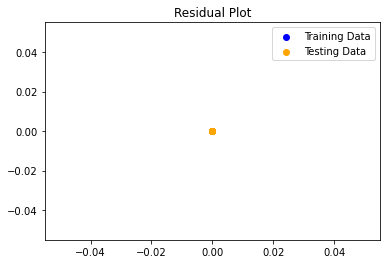

In [50]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [51]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0, R2: 1.0


# Logistic Modeling Revisited v2.0 - Only Stroke Victims

In [36]:
dataframe6 = dataframe3

dataframe6.drop(dataframe6[dataframe6['stroke'] == 0].index, inplace = True)


dataframe6.groupby('stroke')['stroke'].count()

stroke
1    249
Name: stroke, dtype: int64

In [37]:
X = dataframe6[['age', 'hypertension', 'heart_disease', 'Smoke Qualifier', 'stroke']]
print(X.shape)

(249, 5)


In [38]:
data = X.copy()
data_binary_encoded2 = pd.get_dummies(data)
data_binary_encoded2.head()

,age,hypertension,heart_disease,stroke,Smoke Qualifier_N,Smoke Qualifier_Y
0,67.0,0,1,1,0,1
1,61.0,0,0,1,1,0
2,80.0,0,1,1,1,0
3,49.0,0,0,1,0,1
4,79.0,1,0,1,1,0


In [39]:
# Assign X (data) and y (target)
X = data_binary_encoded2.drop("stroke", axis=1)
y = data_binary_encoded2["stroke"]
print(X.shape, y.shape)

(249, 5) (249,)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [42]:
classifier.fit(X_train, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [28]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9545810493343775
Testing Data Score: 0.9413145539906104


In [30]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:100]}")
print(f"First 10 Actual labels: {y_test[:100].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
